<blockquote>Linear_Regression_Bike_Sharing_Assignment</blockquote>

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

In [ ]:
# Steps followed
# 1. Imported all required Libraries
# 2. Read the csv file using pandas
# 3. Understand the Data
# 4. Clearning the data by Dropping columns that are not useful for analysis
# 5. Handle missing values and handle outliers if any
# 6. box plots for independent variables with continuous values
# 7. Convert season , weathersit, mnth,weekday to categorical types
# 8. Draw pairplots for continuous numeric variables using seaborn
# 9. Checking continuous variables relationship with each other using heatmap
# 10. Remove highly correlated value (here temp and atemp are correlated so removing temp)
# 11. heatmap Correlations for numeric variables
# 12. Boxplot for categorical variables to see demands by Analysing Categorical Variabels with target variables with cnt and otyher variables
# 13. Create dummy variables for all categorical variables
# 14. Split Data into training and test
# 15. scale continuous variables
# 16. Use Normalized scaler to scale
# 17. Fit and transform training set only
# 18. Build a Linear Regression model using SKLearn for RFE
# 19. Cut down number of features to 15 using automated approach
# 20. Created a function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
# 21. Created a Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
# 22. Print Columns selected by RFE. We will start with these columns for manual elimination
# 23. Print Features not selected by RFE
# 24. Add 15 columns supported by RFE for regression
# 25. Create a model1 with all the features selected by RFE
# 26. Checking correlation of features selected by RFE and check impact of different features on cnt.
# 27. Check P values and VIF and remove the variables which has high VIF and high P
# 28. Build a model with all columns to select features automatically
# 29. Build the finalmodel using sklearn and important variables
# 30. Plot a histogram of the error terms for  Residucal Analysis , error terms should be normally distributed and no 
# 31. Predict values for test data set
# 32. Check the r-squrrated value 
# 33. Plot test and train models
# 34. Interpret and model and draw details which affect bikesharing cnt values

    

<b>Importing the Required Libraries

In [5]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


<b> Reading Dataset and Understanding Data

In [6]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv('day.csv')

In [7]:
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [9]:
#check dataframe 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#check the details 
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
#check the columns
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
#check the datatypes 
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

<b> Cleaning Data
<b> Drop columns that are not useful for analysis
- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [22]:
# Droping instant column as it is the index
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as it is duplicate we have month and days
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [23]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [25]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [26]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- we can see that features like season, mnth, weekday and  weathersit are integers although they should be non-numerical categories.

<b> Checking missing Values

In [27]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [28]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [29]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

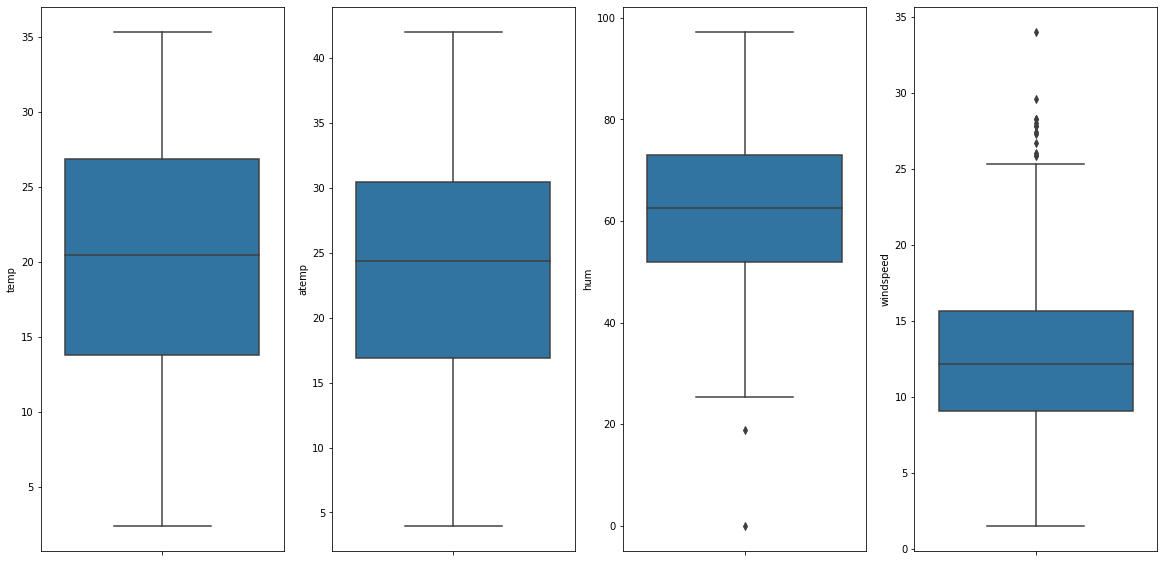

In [30]:
# box plots for independent variables with continuous values
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,10))

i = 1
for columns in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=columns, data=bikeSharing_df)
    i+=1

In [31]:
# Convert season , weathersit, mnth,weekday to categorical types
bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 4320x2160 with 0 Axes>

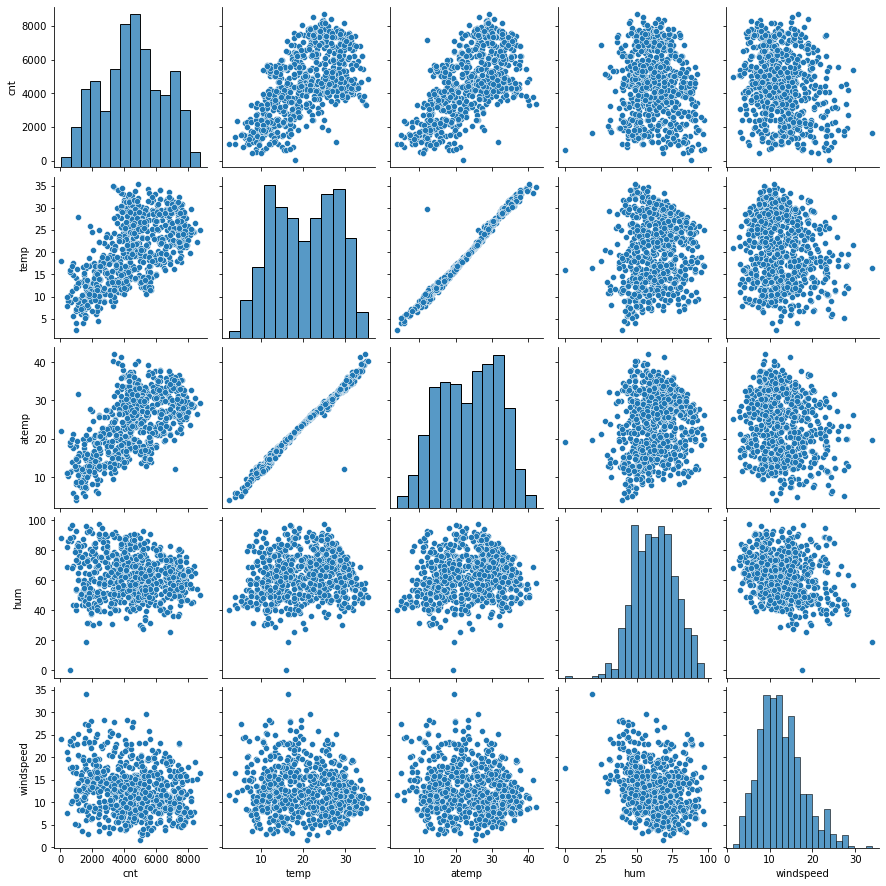

In [32]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (60,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 2160x1080 with 0 Axes>

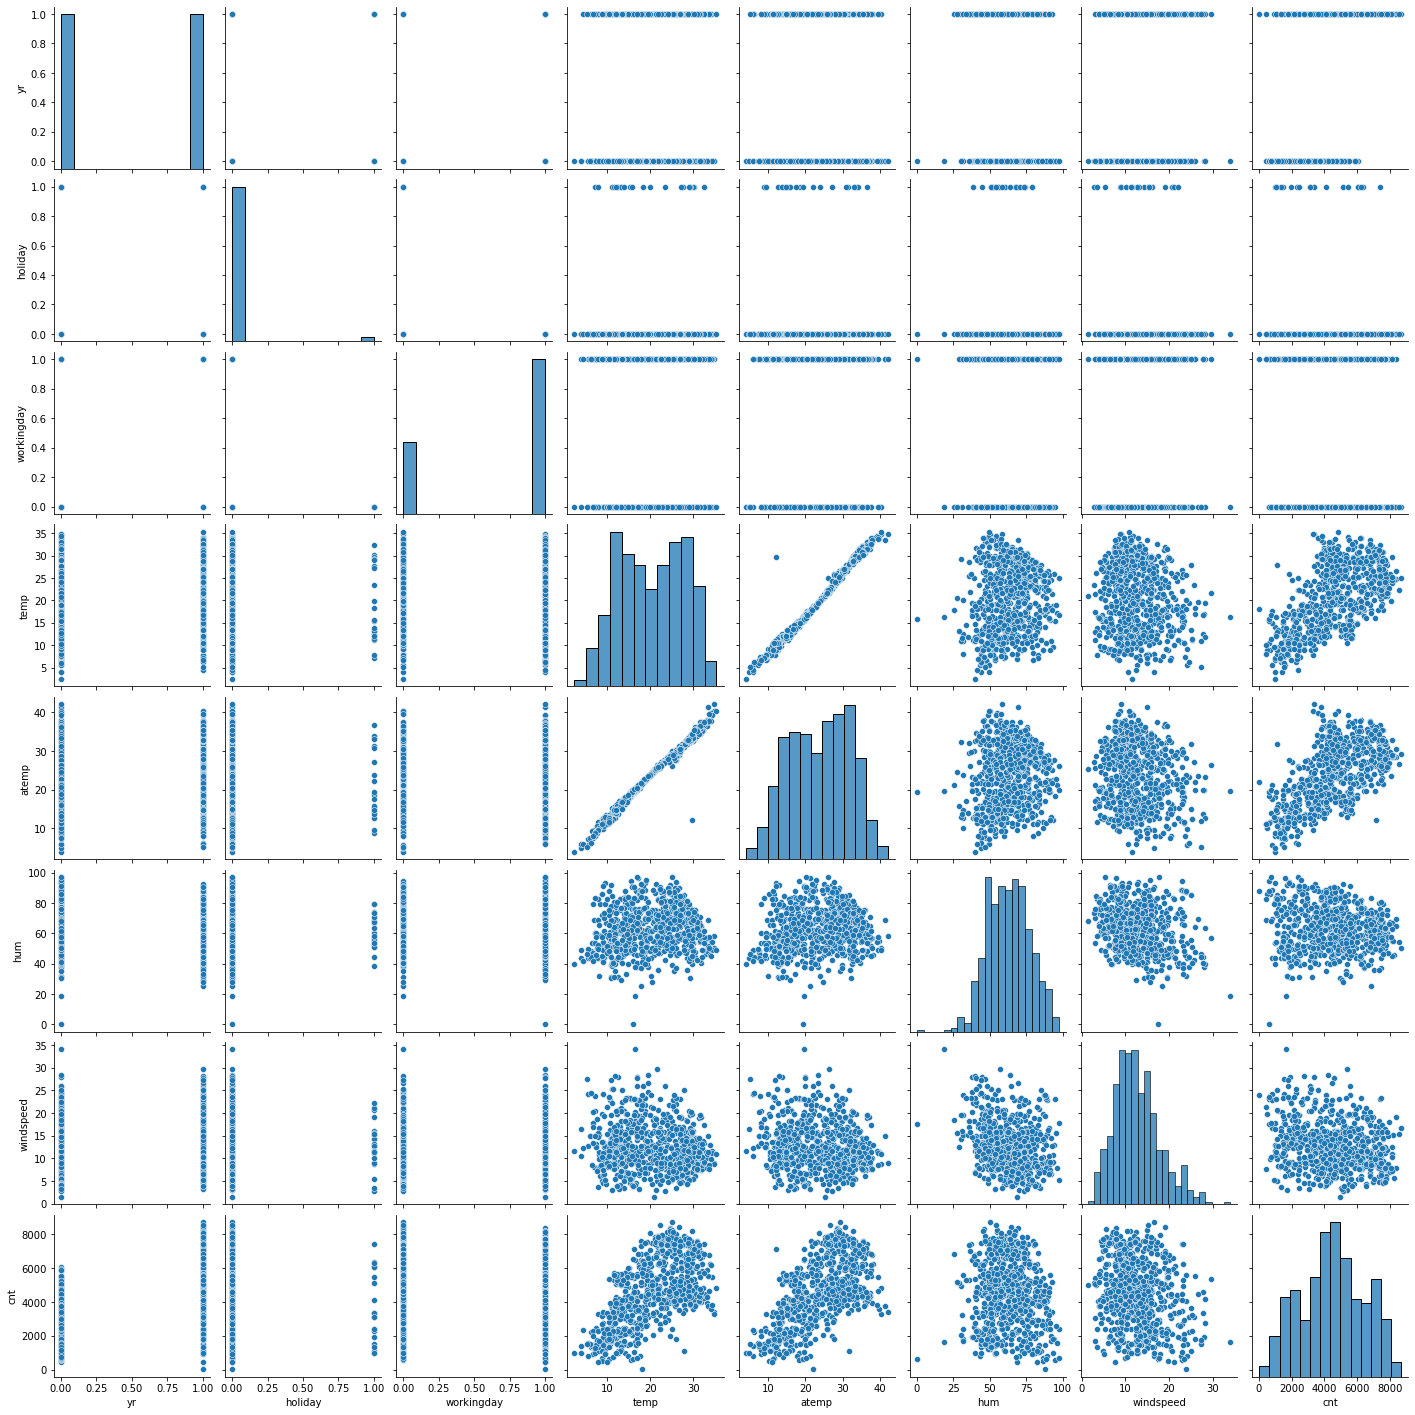

In [33]:
#Visualising the Data to Find the Correlation between the Numerical Variable
plt.figure(figsize=(30,15))
sns.pairplot(bikeSharing_df)
plt.show()

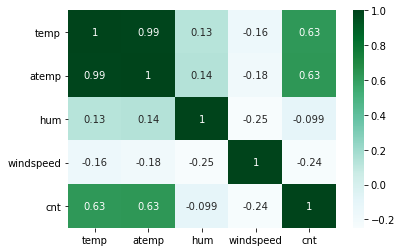

In [34]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [35]:
# Dropping temp as it is highly correlated with temp
bikeSharing_df.drop(['temp'], axis = 1, inplace = True)

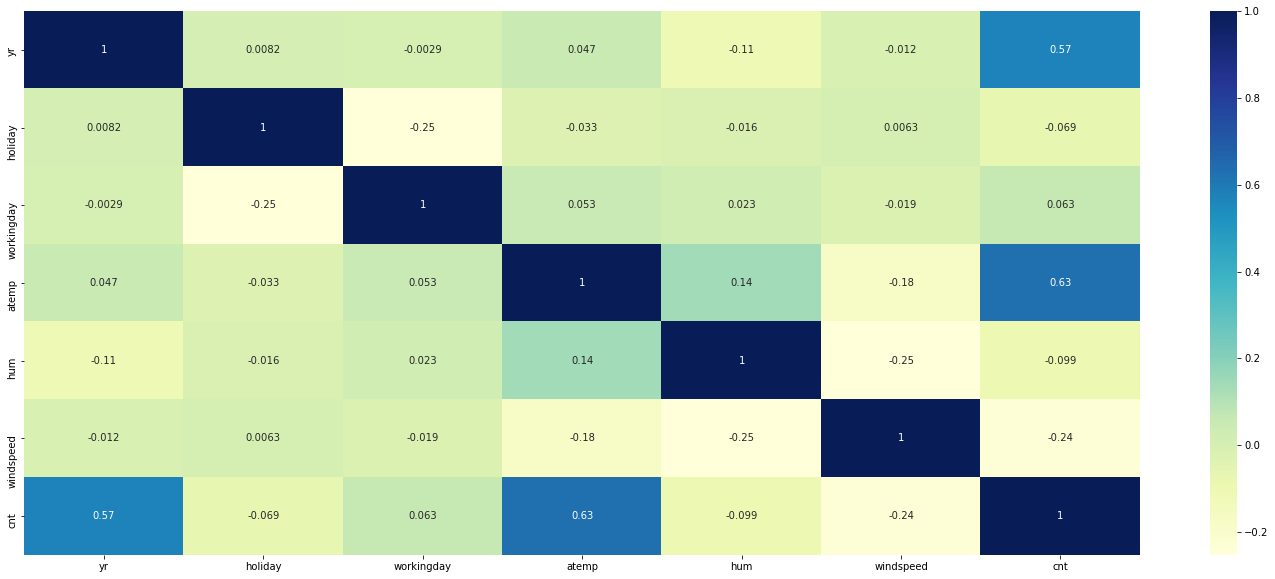

In [37]:
#Calculate Correlation Draw Heatmap of correlation between allvariables
corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

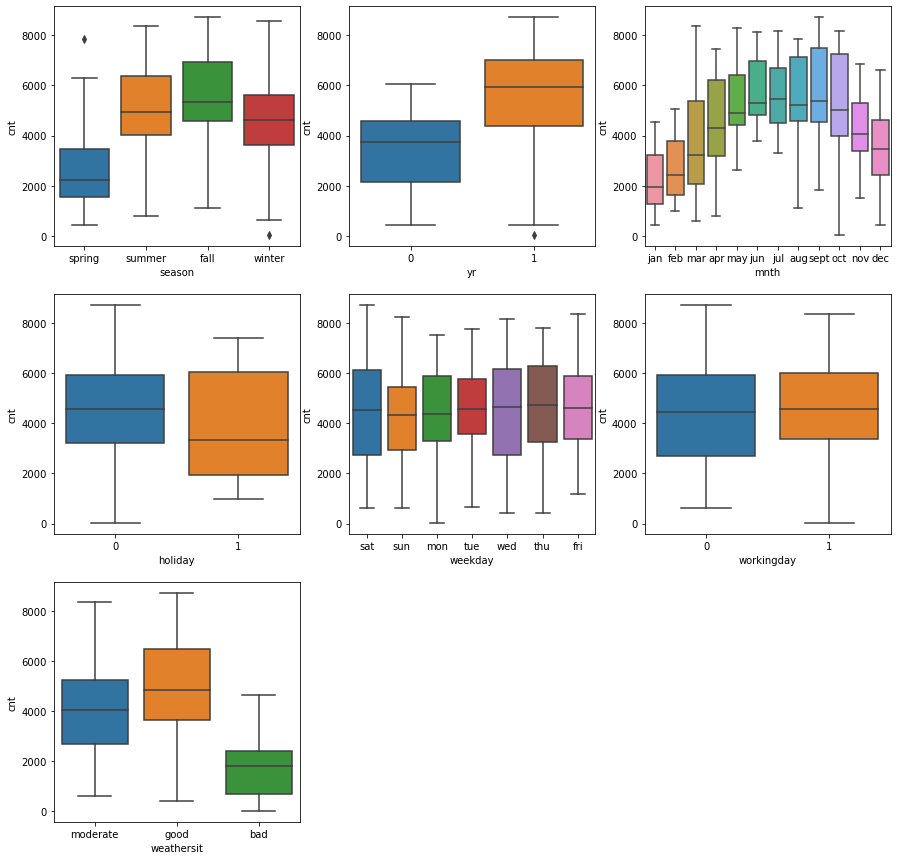

In [38]:
# Boxplot for categorical variables to see demands by Analysing Categorical Variabels with target variables 
vars_categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

- Season: 3:fall has highest demand for rental bikes
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
- When there is a holiday, demand has decreased.
- The clear weathersit has highest demand
- During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

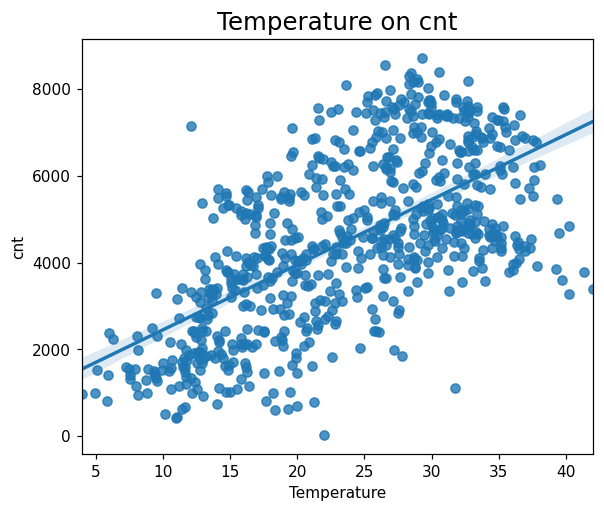

In [40]:
#Variable relation
plt.figure(figsize=(6,5),dpi=110)
plt.title("Temperature on cnt",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="atemp")
plt.xlabel("Temperature")
plt.show()

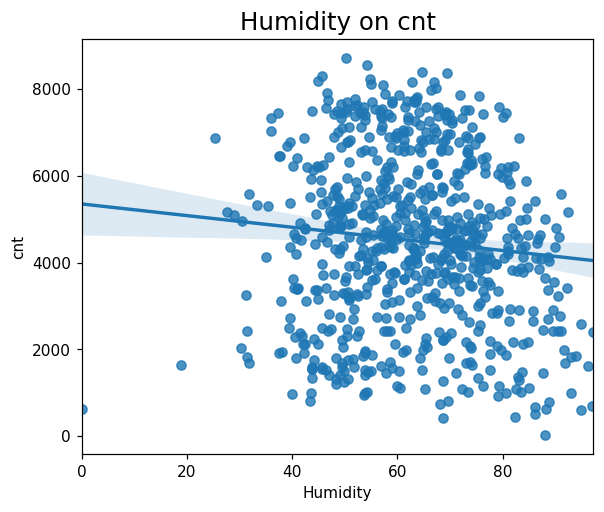

In [41]:
#regplot humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("Humidity on cnt",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

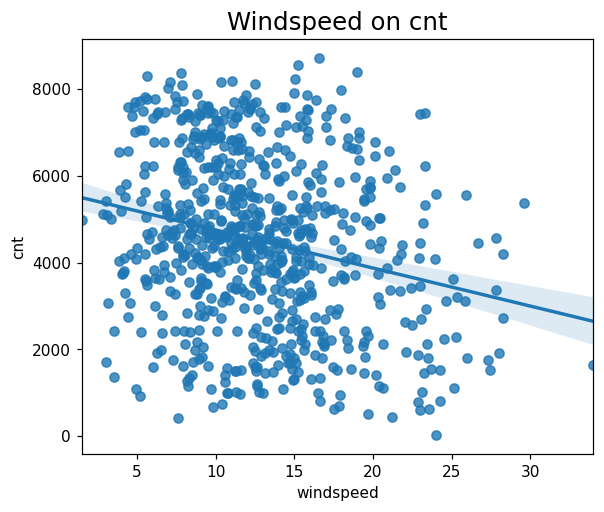

In [42]:
# cnt with windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Windspeed on cnt",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

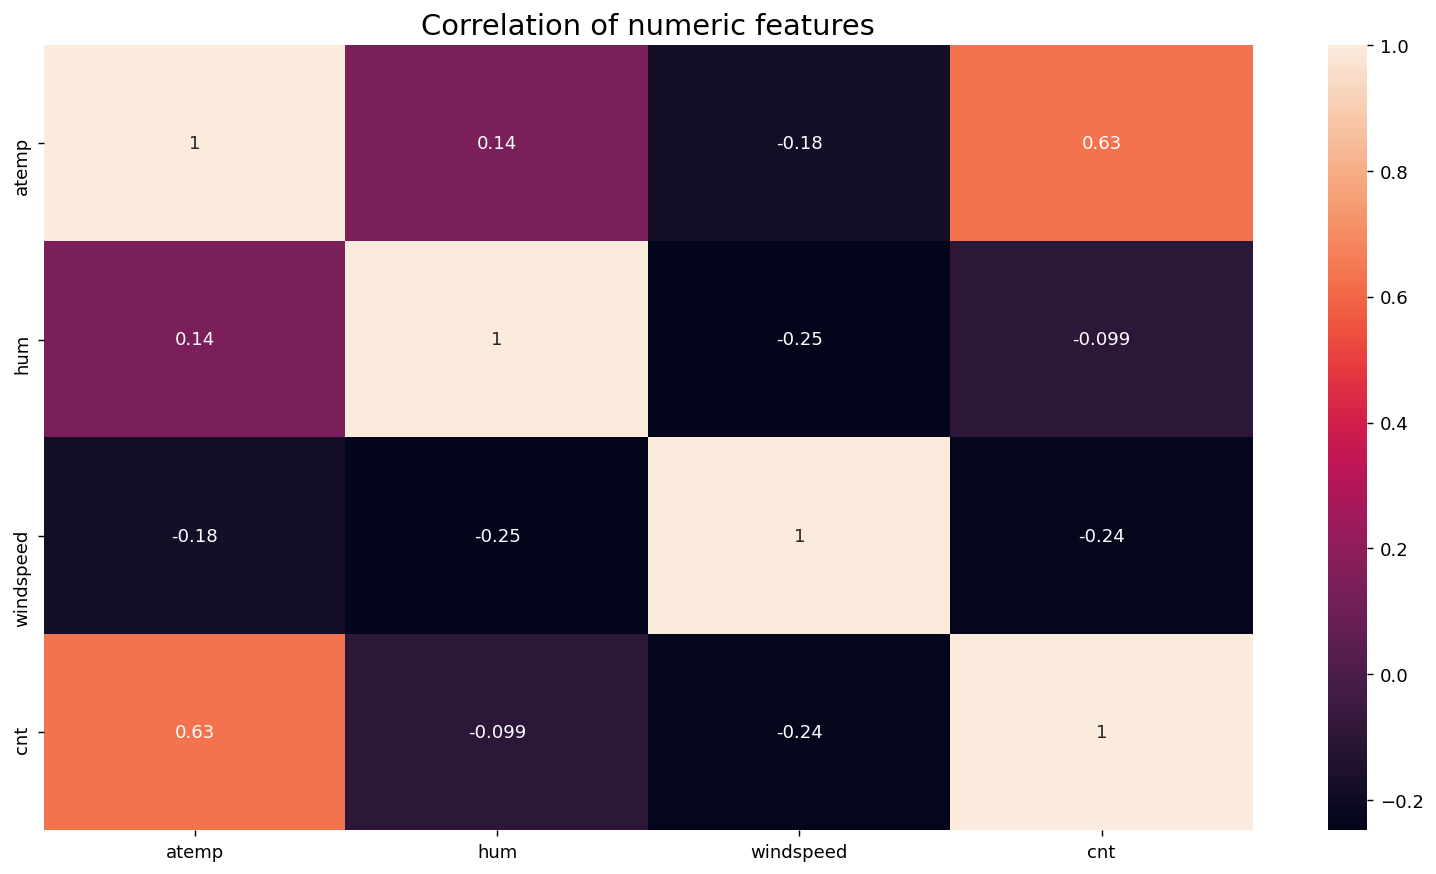

In [44]:
#correlation of all numeric features
num_features = ["atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True)
plt.show()

In [45]:
bikeSharing_df.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000


In [46]:
#Data Preparation for Linear Regression
#Create dummy variables for all categorical variables
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

In [47]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [48]:
#Model Building 
#Split Data into training and test

In [49]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 30)

In [50]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remaining variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [51]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,18.18125,80.5833,10.749882,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [52]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [55]:
#  scale continuous variables
num_vars = ['atemp','hum','windspeed']

from sklearn.preprocessing import MinMaxScaler

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [56]:
X_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,0.095890,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,0.294729,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Build a Linear Regression model using SKLearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [59]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 2),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 8),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [60]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [61]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(columns):
    df1 = X_train[columns]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [62]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [64]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_dec', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [70]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_aug', 'mnth_feb','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']]

In [71]:
X_train_rfe.shape

(511, 15)

In [72]:
#Selected columns for Model 1 - all columns selected by RFE
columns = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_aug', 'mnth_feb','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']

build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.83e-188
Time:                        12:43:27   Log-Likelihood:                -4122.6
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     495   BIC:                             8345.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1440.1570    317.008     

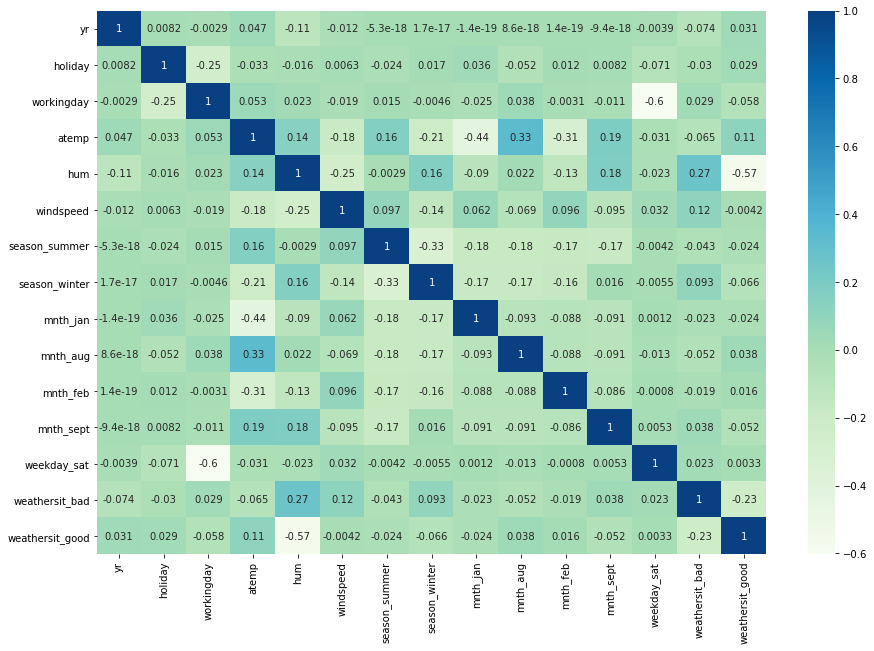

In [73]:
# Checking correlation of features selected by RFE and check impact of different features on cnt.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_aug', 'mnth_feb','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [74]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
columns = ['yr', 'holiday', 'workingday', 'atemp', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_aug', 'mnth_feb','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.79e-185
Time:                        12:48:14   Log-Likelihood:                -4132.0
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     496   BIC:                             8358.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             434.7228    218.397     

In [146]:
# Dropping the variable month_feb as it has negative coefficient and is insignificant as it has high p value
columns = ['yr', 'holiday', 'workingday', 'atemp', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_aug','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.97e-186
Time:                        14:30:42   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             283.0489    194.651     

In [147]:
 #Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'holiday', 'workingday', 'atemp',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_aug','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.36e-181
Time:                        14:30:43   Log-Likelihood:                -4148.8
No. Observations:                 511   AIC:                             8324.
Df Residuals:                     498   BIC:                             8379.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -281.2578    171.289     

In [148]:
#Removing month jan as having high p value
cols = ['yr', 'holiday', 'workingday', 'atemp',
       'season_summer', 'season_winter', 'mnth_aug','mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.41e-181
Time:                        14:30:44   Log-Likelihood:                -4150.5
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     499   BIC:                             8376.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -433.3262    150.637     

In [149]:
cols = ['yr', 'holiday', 'atemp',
        'season_winter', 'mnth_aug','mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.19e-170
Time:                        14:30:44   Log-Likelihood:                -4182.9
No. Observations:                 511   AIC:                             8386.
Df Residuals:                     501   BIC:                             8428.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             164.3850    125.630     

In [150]:
# high p value fro month aug and hence removed
cols = ['yr', 'holiday', 'atemp',
        'season_winter','mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.18e-171
Time:                        14:30:45   Log-Likelihood:                -4183.4
No. Observations:                 511   AIC:                             8385.
Df Residuals:                     502   BIC:                             8423.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             147.9503    124.545     

<b> Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.802 or 80%

In [151]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [152]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'atemp',
        'season_winter','mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good']
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

147.95032817317406 [ 2025.90482098  -982.00008726  5385.33834767   924.8114368
   701.35619976  -448.10121181 -1904.45291807   651.44100108]


In [153]:
y_train_pred = lr.predict(X_train[cols])

In [154]:
#Plot a histogram of the error terms for  Residucal Analysis
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

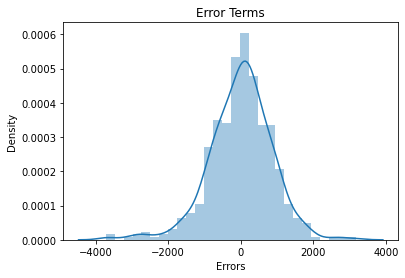

In [155]:
plot_res_dist(y_train, y_train_pred)

<b> Errors are normally distribured here with mean 0. So everything seems to be fine¶


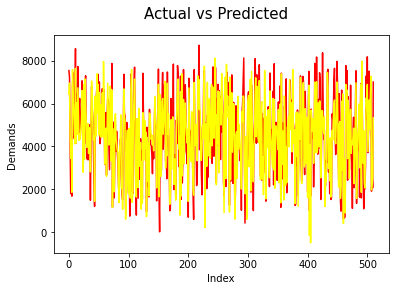

In [156]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="red")
plt.plot(c,y_train_pred, color="yellow")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

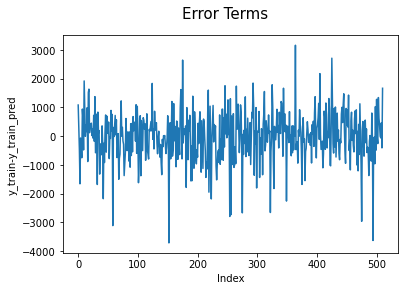

In [157]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [158]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8015474058453662

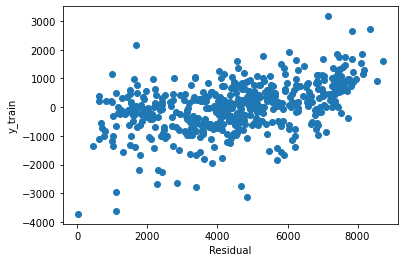

In [145]:
#linearity check
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

<b> r2 is 0.8015474058453662 same as test and train data 

- Conclusion
- Significant variables to predict the demand for shared bikes

    - holiday
    - temp
    - Season
    - Year (2019)
    - Sunday
    - weathersit